In [1]:
import os
import sys
spark_path = "E:/spark"
os.environ['SPARK_HOME'] = spark_path
os.environ['HADOOP_HOME'] = spark_path
os.environ['PYSPARK_PYTHON'] = sys.executable
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")
from pyspark import SparkContext
from pyspark import SparkConf

sc = SparkContext("local", "test")

print sc

In [21]:
from numpy import array

from pyspark.mllib.clustering import KMeans, KMeansModel

data = sc.textFile("file:///E:/BIG DATA/ANOTHERUFO/clean.csv")
data = data.filter(lambda x:"longitude" not in x)

In [22]:
data.take(4)

[u'29.8830556,-97.9411111',
 u'29.38421,-98.581082',
 u'53.2,-2.916667',
 u'28.9783333,-96.6458333']

In [23]:
from collections import namedtuple
import matplotlib.pyplot as plt
from math import sqrt

fields = ('latitude','longitude')

Ufo = namedtuple('Ufo',fields,verbose=True)

def parse(row):
    row[9] = float(row[9])
    row[10]= float(row[10])
    return Ufo(*row[9:11])
    
temp_data = data.map(lambda x: x.split(','))
temp_data = temp_data.filter(lambda x: len(x) == 12)
temp_data = temp_data.filter(lambda x: RepresentsFloat(x[9],x[10]) == True)
datafix = temp_data.map(parse)

class Ufo(tuple):
    'Ufo(latitude, longitude)'

    __slots__ = ()

    _fields = ('latitude', 'longitude')

    def __new__(_cls, latitude, longitude):
        'Create new instance of Ufo(latitude, longitude)'
        return _tuple.__new__(_cls, (latitude, longitude))

    @classmethod
    def _make(cls, iterable, new=tuple.__new__, len=len):
        'Make a new Ufo object from a sequence or iterable'
        result = new(cls, iterable)
        if len(result) != 2:
            raise TypeError('Expected 2 arguments, got %d' % len(result))
        return result

    def __repr__(self):
        'Return a nicely formatted representation string'
        return 'Ufo(latitude=%r, longitude=%r)' % self

    def _asdict(self):
        'Return a new OrderedDict which maps field names to their values'
        return OrderedDict(zip(self._fields, self))

    def _replace(_self, **kwds):
        'Return a new Ufo object replacing specified fields with new values'
        result = _self._make(map

In [24]:
def plot(centers):
    for i in range(len(centers)):
        plt.plot(centers[i], '-o')
   
k=5     

parsedData = datafix.map(lambda line: array([line.latitude, line.longitude]))

In [25]:
parsedData.take(3)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 37.0 failed 1 times, most recent failure: Lost task 0.0 in stage 37.0 (TID 37, localhost, executor driver): java.net.SocketException: Connection reset by peer: socket write error
	at java.net.SocketOutputStream.socketWrite0(Native Method)
	at java.net.SocketOutputStream.socketWrite(SocketOutputStream.java:111)
	at java.net.SocketOutputStream.write(SocketOutputStream.java:155)
	at java.io.BufferedOutputStream.flushBuffer(BufferedOutputStream.java:82)
	at java.io.BufferedOutputStream.write(BufferedOutputStream.java:126)
	at java.io.DataOutputStream.write(DataOutputStream.java:107)
	at java.io.FilterOutputStream.write(FilterOutputStream.java:97)
	at org.apache.spark.api.python.PythonRDD$.writeUTF(PythonRDD.scala:674)
	at org.apache.spark.api.python.PythonRDD$.org$apache$spark$api$python$PythonRDD$$write$1(PythonRDD.scala:494)
	at org.apache.spark.api.python.PythonRDD$$anonfun$writeIteratorToStream$1.apply(PythonRDD.scala:504)
	at org.apache.spark.api.python.PythonRDD$$anonfun$writeIteratorToStream$1.apply(PythonRDD.scala:504)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1336)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:504)
	at org.apache.spark.api.python.PythonRunner$WriterThread$$anonfun$run$3.apply(PythonRDD.scala:328)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1951)
	at org.apache.spark.api.python.PythonRunner$WriterThread.run(PythonRDD.scala:269)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1435)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1423)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1422)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1422)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1650)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1605)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1594)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:628)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1918)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1931)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1944)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:441)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:745)
Caused by: java.net.SocketException: Connection reset by peer: socket write error
	at java.net.SocketOutputStream.socketWrite0(Native Method)
	at java.net.SocketOutputStream.socketWrite(SocketOutputStream.java:111)
	at java.net.SocketOutputStream.write(SocketOutputStream.java:155)
	at java.io.BufferedOutputStream.flushBuffer(BufferedOutputStream.java:82)
	at java.io.BufferedOutputStream.write(BufferedOutputStream.java:126)
	at java.io.DataOutputStream.write(DataOutputStream.java:107)
	at java.io.FilterOutputStream.write(FilterOutputStream.java:97)
	at org.apache.spark.api.python.PythonRDD$.writeUTF(PythonRDD.scala:674)
	at org.apache.spark.api.python.PythonRDD$.org$apache$spark$api$python$PythonRDD$$write$1(PythonRDD.scala:494)
	at org.apache.spark.api.python.PythonRDD$$anonfun$writeIteratorToStream$1.apply(PythonRDD.scala:504)
	at org.apache.spark.api.python.PythonRDD$$anonfun$writeIteratorToStream$1.apply(PythonRDD.scala:504)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1336)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:504)
	at org.apache.spark.api.python.PythonRunner$WriterThread$$anonfun$run$3.apply(PythonRDD.scala:328)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1951)
	at org.apache.spark.api.python.PythonRunner$WriterThread.run(PythonRDD.scala:269)


In [12]:
clusters = KMeans.train(parsedData, k, maxIterations=1000, initializationMode="random")

In [15]:
import numpy as np

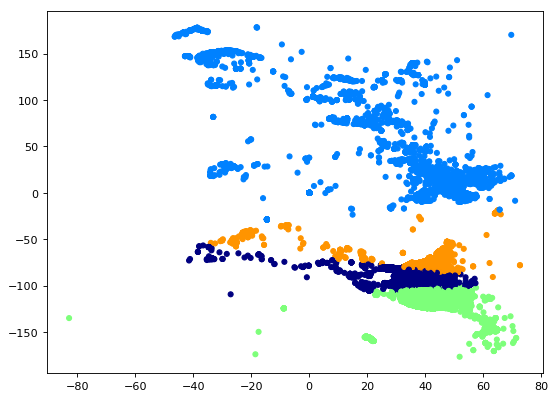

In [20]:

%matplotlib inline
cmap = plt.get_cmap('jet')
colormap = cmap(np.linspace(0, 1, k))

a=clusters.predict(parsedData)
b=parsedData.collect()        
c=np.mat(b)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(c[:,0], c[:,1], c=colormap[a.collect()], s=20)
plt.show()